In [1]:
import yfinance as yf
symbole_msft = yf.Ticker("MSFT")
df_historique_msft = symbole_msft.history(period="max") # Chercher l'historique des prix de l'action
df_historique_msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.055898,0.064119,0.055898,0.061378,1031788800,0.0,0.0
1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0


<AxesSubplot:xlabel='Date'>

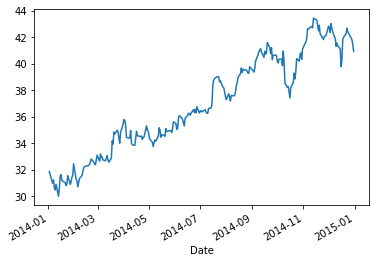

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
df_historique_msft_2014_close = df_historique_msft['2014-01-01': '2015-01-01']['Close']
df_historique_msft_2014_close.plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

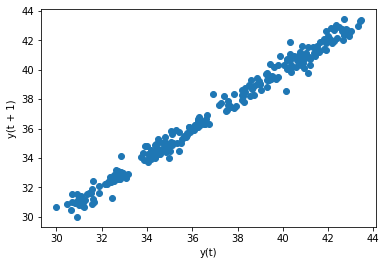

In [3]:
from pandas.plotting import lag_plot
plt.figure()
# Affiche Yt+lag vs Yt
# Si lag=1 affiche serie[:-1] vs. serie[1:]
lag_plot(df_historique_msft_2014_close,lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

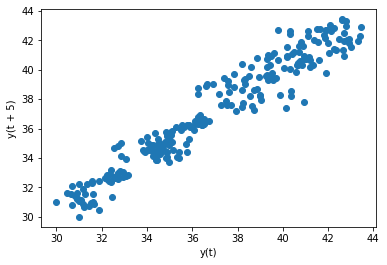

In [4]:
lag_plot(df_historique_msft_2014_close, lag=5)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

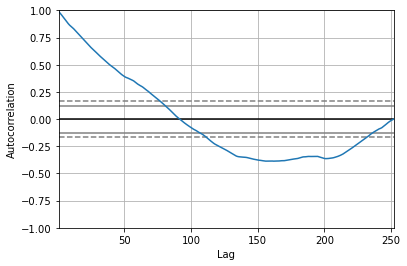

In [5]:
from pandas.plotting import autocorrelation_plot
plt.figure()
# La ligne pleine indique l'intervalle de confiance à 95%
# La ligne pointillée indique l'intervalle de confiance à 99%
autocorrelation_plot(df_historique_msft_2014_close)

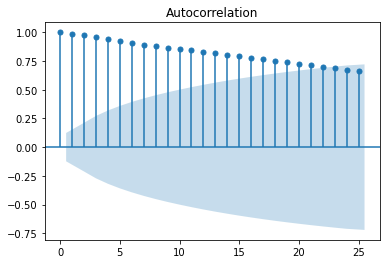

In [6]:
# plot_acf() de statsmodel produit un graphique similaire
# le cône est un intervalle de confiance à 95%
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load set
plot_acf(df_historique_msft_2014_close)
plt.show()

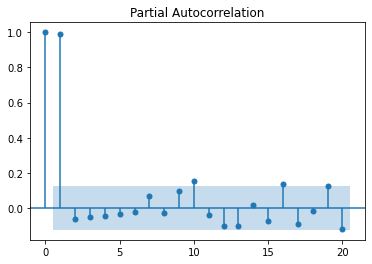

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
# Autocorrélation partielle : corrélation après avoir enlevé l'effet des données plus récentes par rapport à cible
plot_pacf(df_historique_msft_2014_close, lags=20)
plt.show()

Modèle AR(1) : AIC =  -1.6298755428525133
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:                     AutoReg(1)   Log Likelihood                -148.604
Method:               Conditional MLE   S.D. of innovations              0.437
Date:                Fri, 11 Feb 2022   AIC                             -1.630
Time:                        17:17:33   BIC                             -1.588
Sample:                             1   HQIC                            -1.613
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3561      0.280      1.273      0.203      -0.192       0.904
Close.L1       0.9913      0.008    131.550      0.000       0.977       1.006
          

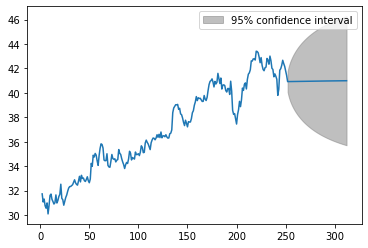

In [9]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=1)
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

Modèle AR(1) : AIC =  -1.6605111413603382
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:             Restr. AutoReg(10)   Log Likelihood                -138.461
Method:               Conditional MLE   S.D. of innovations              0.429
Date:                Fri, 11 Feb 2022   AIC                             -1.661
Time:                        17:17:42   BIC                             -1.603
Sample:                            10   HQIC                            -1.637
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3958      0.292      1.357      0.175      -0.176       0.967
Close.L1       0.9592      0.024     39.473      0.000       0.912       1.007
Close.L10 

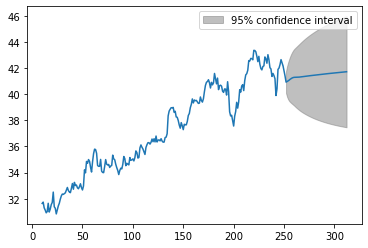

In [10]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=[1,10])
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

In [11]:
from statsmodels.tsa.ar_model import ar_select_order
modeles = ar_select_order(df_historique_msft_2014_close,maxlag=20)
print("Décalages choisis:", modeles.ar_lags)

Décalages choisis: [1]


Modèle AR(1) : AIC =  -1.6348580547360079
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:                    AutoReg(20)   Log Likelihood                -117.550
Method:               Conditional MLE   S.D. of innovations              0.402
Date:                Fri, 11 Feb 2022   AIC                             -1.635
Time:                        17:17:53   BIC                             -1.308
Sample:                            20   HQIC                            -1.503
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4378      0.294      1.490      0.136      -0.138       1.014
Close.L1       1.0847      0.065     16.811      0.000       0.958       1.211
Close.L2  

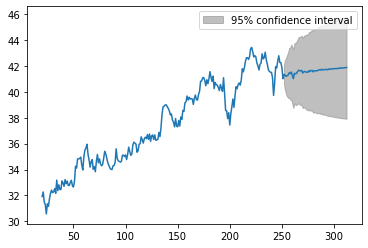

In [12]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=20)
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

Modèle AR(1) : AIC =  -1.6599179984364212
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  252
Model:             Restr. AutoReg(20)   Log Likelihood                -129.643
Method:               Conditional MLE   S.D. of innovations              0.423
Date:                Fri, 11 Feb 2022   AIC                             -1.660
Time:                        17:17:57   BIC                             -1.556
Sample:                            20   HQIC                            -1.618
                                  252                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4685      0.309      1.515      0.130      -0.138       1.075
Close.L1       0.9571      0.025     38.424      0.000       0.908       1.006
Close.L10 

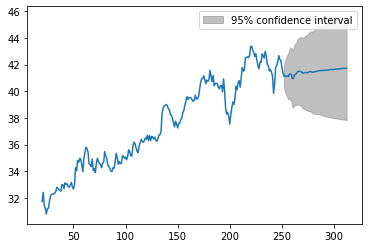

In [13]:
from statsmodels.tsa.ar_model import AutoReg
modele_ar1 = AutoReg(df_historique_msft_2014_close,lags=[1,10,16,19,20])
modele_fit = modele_ar1.fit()
print('Modèle AR(1) : AIC = ', modele_fit.aic)
print(modele_fit.summary())
modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+60)
plt.show()

ARMA(0, 0) - AIC:1373.7568589653872
ARMA(0, 1) - AIC:1070.8647099526913
ARMA(1, 0) - AIC:311.2362072129503
ARMA(1, 1) - AIC:313.20809810999407
ARMA(1, 2) - AIC:314.7500357128583
ARMA(2, 0) - AIC:313.2103684998206
ARMA(2, 1) - AIC:319.46946733408123
ARMA(2, 2) - AIC:323.65778475931484
Meilleur modèle est ARMA(1, 0): AIC=311.2362072129503
                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  252
Model:                     ARMA(1, 0)   Log Likelihood                -152.618
Method:                       css-mle   S.D. of innovations              0.440
Date:                Fri, 11 Feb 2022   AIC                            311.236
Time:                        17:18:02   BIC                            321.824
Sample:                             0   HQIC                           315.497
                                                                              
                  coef    std

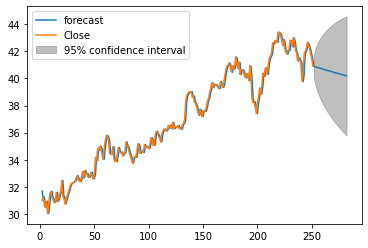

In [14]:
import numpy as np
import pandas as pd
import itertools
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings("ignore")

meilleur_aic= np.inf
meilleurs_parametres = (0,0)
for p in range(0,3):
    for q in range(0,3):
        try:
            modele_arima = ARMA(df_historique_msft_2014_close,order=(p,q))
            modele_fit = modele_arima.fit()
            if modele_fit.aic < meilleur_aic:
                meilleur_aic = modele_fit.aic
                meilleurs_parametres = (p,q)
            print('ARMA{} - AIC:{}'.format((p,q), modele_fit.aic))
        except:
            continue     

print('Meilleur modèle est ARMA{}: AIC={}'.format(meilleurs_parametres, meilleur_aic))
meilleur_modele = ARMA(df_historique_msft_2014_close, order=meilleurs_parametres)
modele_fit = meilleur_modele.fit(disp=0) 
print(modele_fit.summary())

modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+30)
plt.show()

ARIMA(0, 0, 0) - AIC:1373.7568589653872
ARIMA(0, 0, 1) - AIC:1070.8647099526913
ARIMA(0, 1, 0) - AIC:302.5270863978324
ARIMA(0, 1, 1) - AIC:304.5267603698782
ARIMA(0, 1, 2) - AIC:305.73474587700326
ARIMA(0, 2, 0) - AIC:474.9774283026044
ARIMA(0, 2, 1) - AIC:309.78403624320674
ARIMA(0, 2, 2) - AIC:311.78203640591073
ARIMA(1, 0, 0) - AIC:311.2362072129503
ARIMA(1, 0, 1) - AIC:313.20809810999407
ARIMA(1, 0, 2) - AIC:314.7500357128583
ARIMA(1, 1, 0) - AIC:304.5267945979679
ARIMA(1, 1, 1) - AIC:297.4458483865217
ARIMA(1, 1, 2) - AIC:298.80942927249527
ARIMA(1, 2, 0) - AIC:412.64344930435345
ARIMA(1, 2, 1) - AIC:311.7822570130549
ARIMA(1, 2, 2) - AIC:313.7633755746431
ARIMA(2, 0, 0) - AIC:313.2103684998206
ARIMA(2, 0, 1) - AIC:319.46946733408123
ARIMA(2, 0, 2) - AIC:323.65778475931484
ARIMA(2, 1, 0) - AIC:305.828196372766
ARIMA(2, 1, 1) - AIC:307.23242445193694
ARIMA(2, 1, 2) - AIC:301.4450962150881
ARIMA(2, 2, 0) - AIC:375.4397268934818
ARIMA(2, 2, 1) - AIC:313.1783215213266
ARIMA(2, 2, 2) 

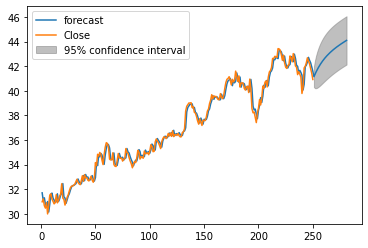

In [15]:
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore")
meilleur_aic= np.inf
meilleurs_parametres = (0,0,0)
for p in range(0,3):
    for d in range(0,3):
        for q in range(0,3):
            try:
                modele_arima = ARIMA(df_historique_msft_2014_close,order=(p,d,q))
                modele_fit = modele_arima.fit()
                if modele_fit.aic < meilleur_aic:
                    meilleur_aic = modele_fit.aic
                    meilleurs_parametres = (p,d,q)
                print('ARIMA{} - AIC:{}'.format((p,d,q), modele_fit.aic))
            except:
                continue     

print('Meilleur modèle est ARIMA{}: AIC={}'.format(meilleurs_parametres, meilleur_aic))
meilleur_modele = ARIMA(df_historique_msft_2014_close, order=meilleurs_parametres)
modele_fit = meilleur_modele.fit(disp=0) 
print(modele_fit.summary())

modele_fit.plot_predict(start=2, end=len(df_historique_msft_2014_close)+30)
plt.show()